In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_nam14_UNAVCO

%matplotlib inline

In [2]:
datum = '????'
ext = '.csv'
meth = '.cwu.nam14'
dir_in = 'data/GPS'


In [3]:
pattern = os.path.join(dir_in, datum + meth + ext)
print(pattern)

data/GPS\????.cwu.nam14.csv


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\ASKY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-20   0.00  0.00      0.00      2.00     1.53         9.87   repro
2007-08-21   1.82 -0.63     -2.30      2.02     1.53         9.82   repro
2007-08-22  -0.98  0.33     -3.36      2.01     1.54         9.82   repro
2007-08-23  -0.35 -1.54     -4.23      1.97     1.51         9.60   repro
2007-08-24  -0.76 -1.11     -1.18      2.05     1.57        10.15   repro


data/GPS\BLAS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-07-08   0.00  0.00      0.00      1.91     1.59        10.91   repro
2008-07-09   0.30  0.73     -8.95      1.93     1.59        11.11   repro
2008-07-10   1.84 -0.15    -13.82      2.03     1.70        11.66   repro
2008-07-11  -0.48  0.64    -16.57      1.99     1.60



data/GPS\KMJP.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-07-16   0.00  0.00      0.00      1.84     1.58        12.91   repro
2008-07-17   0.97  0.53     -2.31      1.78     1.59        12.41   repro
2008-07-18   1.93 -0.18     -4.24      1.83     1.61        12.59   repro
2008-07-19   0.58  0.48     -6.43      1.80     1.59        12.47   repro
2008-07-20   1.59 -0.05      3.32      1.73     1.54        12.08   repro


data/GPS\KMOR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-09-04   0.00  0.00      0.00      1.80     1.49        11.49   repro
2007-09-05  -1.29 -0.19     -4.03      1.82     1.52        11.63   repro
2007-09-06  -0.96  0.26    -16.53      1.82     1.52        11.67   repro
2007-09-07  -0.41 -0.84     -2.51      1.86     1.56

2007-08-16  -0.15 -0.49      5.80      2.44     1.70         8.95   repro


data/GPS\QAAR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-29   0.00  0.00      0.00      3.39     2.35        13.85   repro
2007-08-30  -0.25  2.07    -14.48      2.27     1.64         9.37   repro
2007-08-31  -1.80  1.80    -12.33      2.29     1.61         9.33   repro
2007-09-01  -1.15  3.39    -21.01      2.33     1.62         9.54   repro
2007-09-02   0.55  3.01    -11.65      2.53     1.72        10.17   repro


data/GPS\RINK.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-31   0.00  0.00      0.00      2.34     1.69         9.92   repro
2007-09-01   1.60  0.62     -3.19      2.22     1.62         9.42   repro
2007-09-02   3.23  1.46     -4.04      2.41     1.73

In [6]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    
    return res

def test_plot_OLS(df, res, site, var):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    



data/GPS\ASKY.cwu.nam14.csv
f: 0
Trend = 53.75 mm/yr


data/GPS\BLAS.cwu.nam14.csv
f: 1
Trend = 21.44 mm/yr


data/GPS\DGJG.cwu.nam14.csv
f: 2
Trend = 10.09 mm/yr


data/GPS\DKSG.cwu.nam14.csv
f: 3
Trend = 51.12 mm/yr


data/GPS\GMMA.cwu.nam14.csv
f: 4
Trend = 16.85 mm/yr


data/GPS\GROK.cwu.nam14.csv
f: 5
Trend = 20.49 mm/yr


data/GPS\HEL2.cwu.nam14.csv
f: 6
Trend = 45.05 mm/yr


data/GPS\HJOR.cwu.nam14.csv
f: 7
Trend = 15.67 mm/yr


data/GPS\HMBG.cwu.nam14.csv
f: 8
Trend = 3.29 mm/yr


data/GPS\HRDG.cwu.nam14.csv
f: 9
Trend = 20.95 mm/yr


data/GPS\JGBL.cwu.nam14.csv
f: 10
Trend = 16.62 mm/yr


data/GPS\JWLF.cwu.nam14.csv
f: 11
Trend = 18.72 mm/yr


data/GPS\KAGA.cwu.nam14.csv
f: 12
Trend = 49.98 mm/yr


data/GPS\KAGZ.cwu.nam14.csv
f: 13
Trend = 26.29 mm/yr


data/GPS\KBUG.cwu.nam14.csv
f: 14
Trend = 21.59 mm/yr


data/GPS\KMJP.cwu.nam14.csv
f: 15
Trend = 12.88 mm/yr


data/GPS\KMOR.cwu.nam14.csv
f: 16
Trend = 19.93 mm/yr


data/GPS\KSNB.cwu.nam14.csv
f: 17
Trend = 35.15 mm/yr


d

C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\LBIB.cwu.nam14.csv
f: 21
Trend = 5.38 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\LEFN.cwu.nam14.csv
f: 22
Trend = 16.57 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\LYNS.cwu.nam14.csv
f: 23
Trend = 20.19 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\MARG.cwu.nam14.csv
f: 24
Trend = 22.56 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\MIK2.cwu.nam14.csv
f: 25
Trend = 34.91 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\MSVG.cwu.nam14.csv
f: 26
Trend = 8.74 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\NNVN.cwu.nam14.csv
f: 27
Trend = 15.26 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\NRSK.cwu.nam14.csv
f: 28
Trend = 16.04 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\PLPK.cwu.nam14.csv
f: 29
Trend = 31.21 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\QAAR.cwu.nam14.csv
f: 30
Trend = 23.57 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\RINK.cwu.nam14.csv
f: 31
Trend = 25.22 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\SCBY.cwu.nam14.csv
f: 32
Trend = 28.93 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\SENU.cwu.nam14.csv
f: 33
Trend = 25.22 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\SRMP.cwu.nam14.csv
f: 34
Trend = 42.48 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\TIMM.cwu.nam14.csv
f: 35
Trend = 24.70 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\TREO.cwu.nam14.csv
f: 36
Trend = 19.55 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\UTMG.cwu.nam14.csv
f: 37
Trend = 21.02 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\VFDG.cwu.nam14.csv
f: 38
Trend = 13.28 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\WTHG.cwu.nam14.csv
f: 39
Trend = 6.77 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




data/GPS\YMER.cwu.nam14.csv
f: 40
Trend = 6.58 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


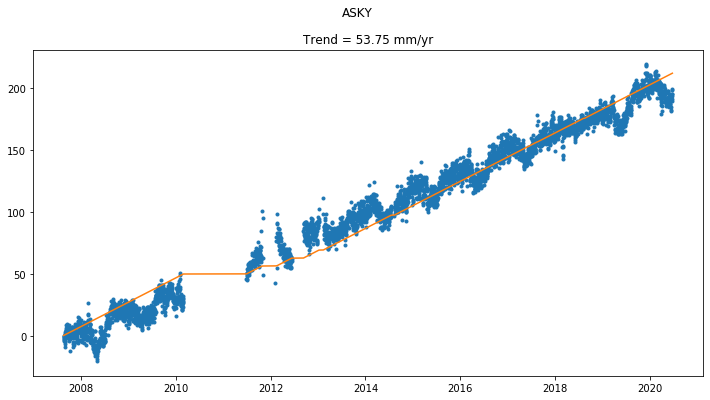

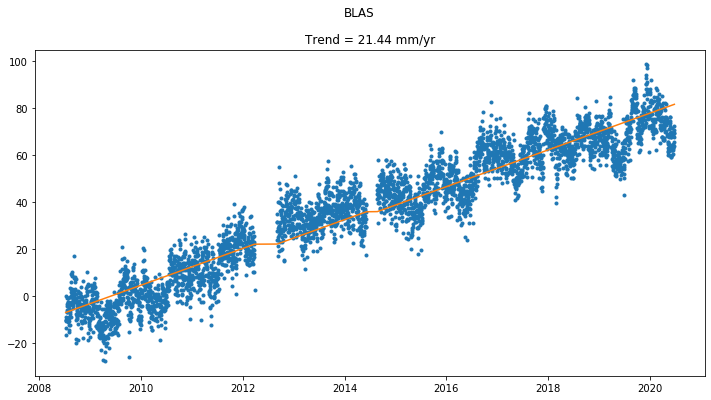

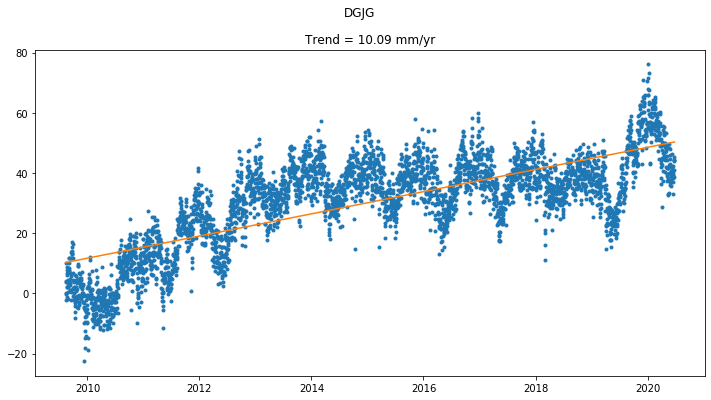

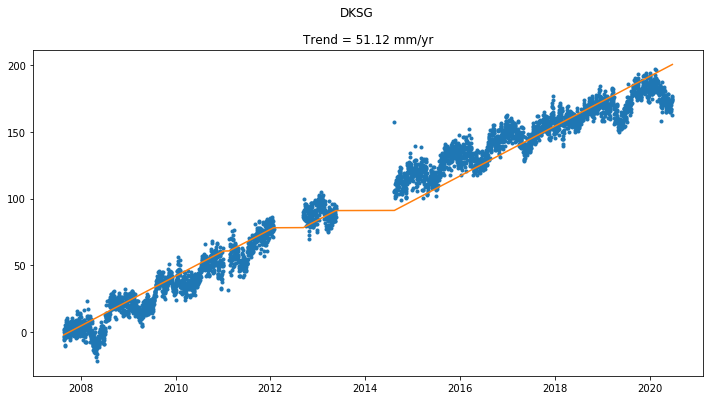

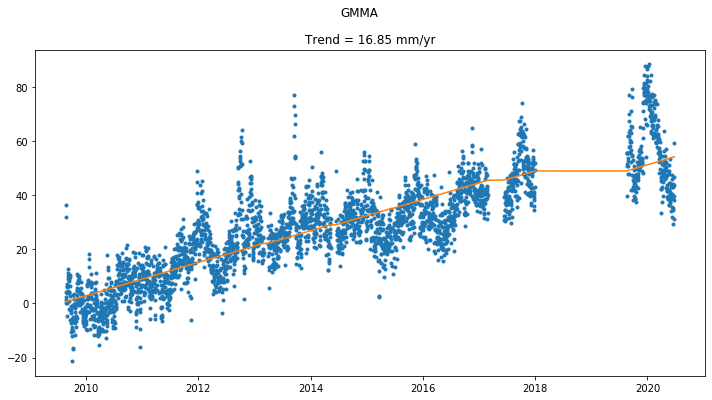

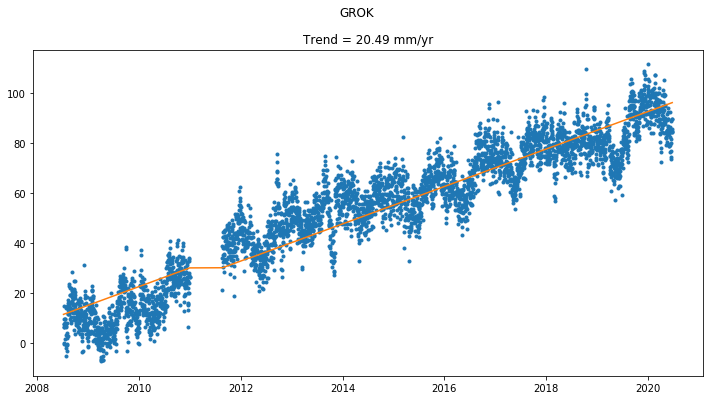

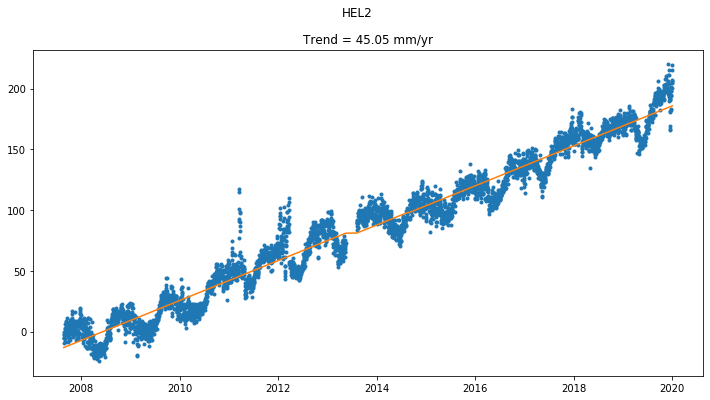

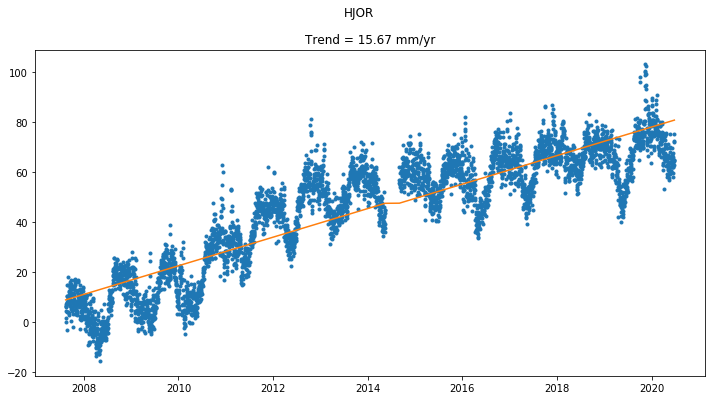

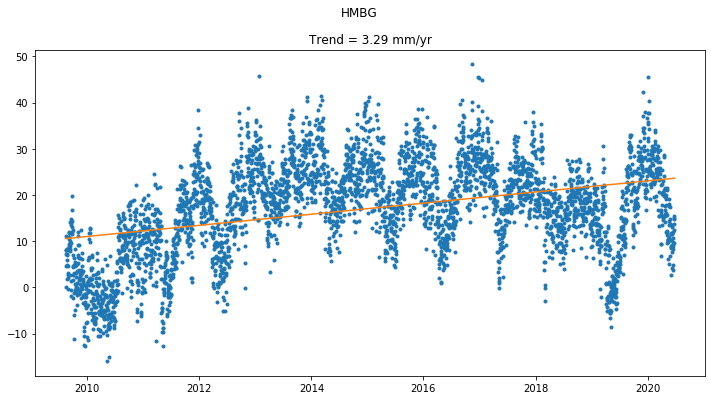

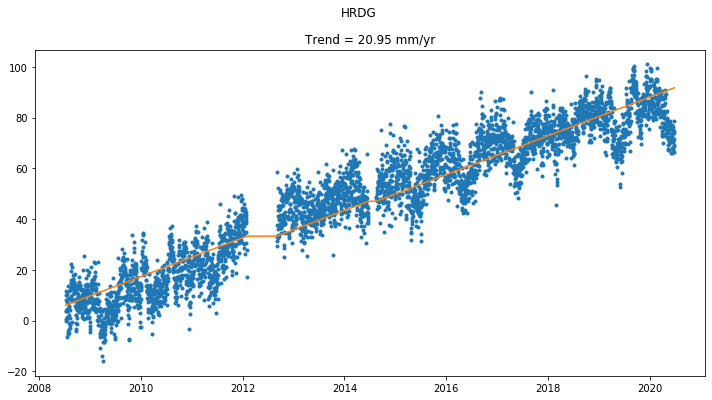

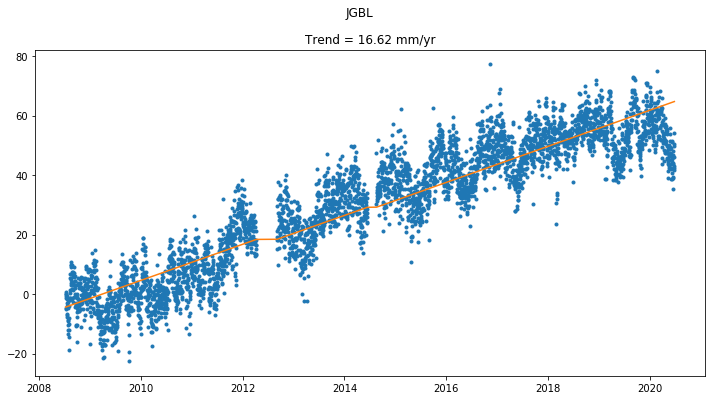

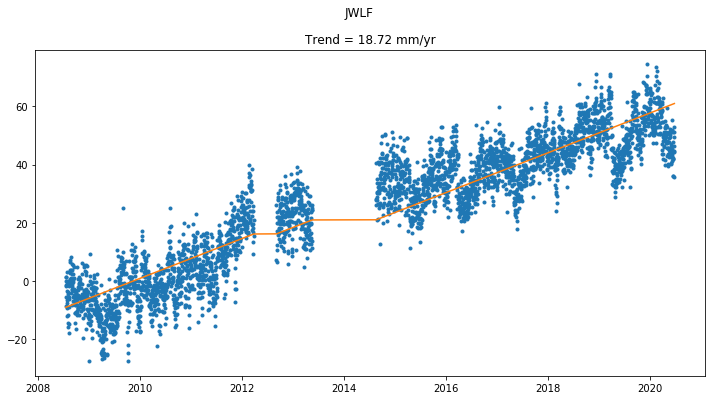

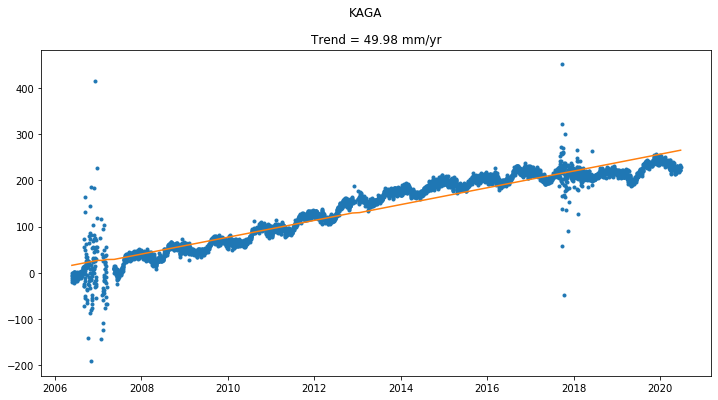

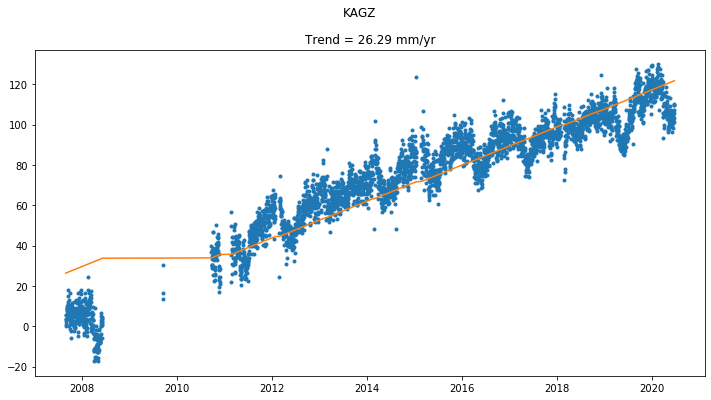

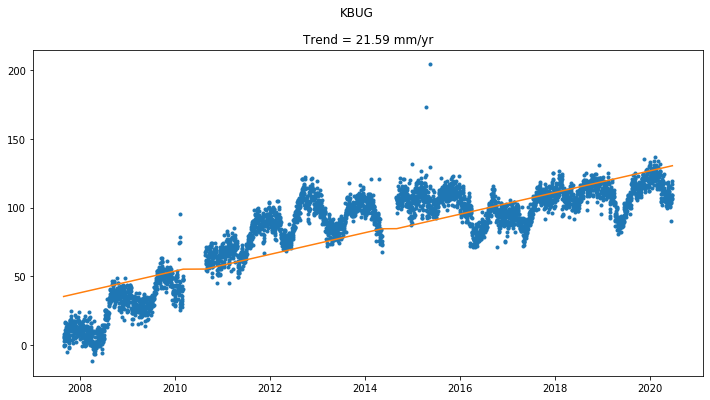

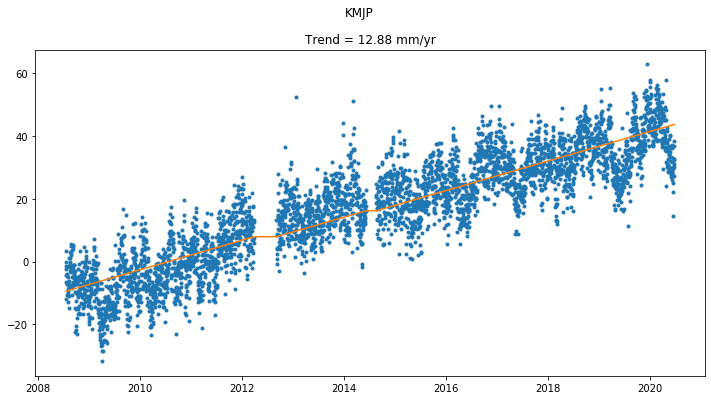

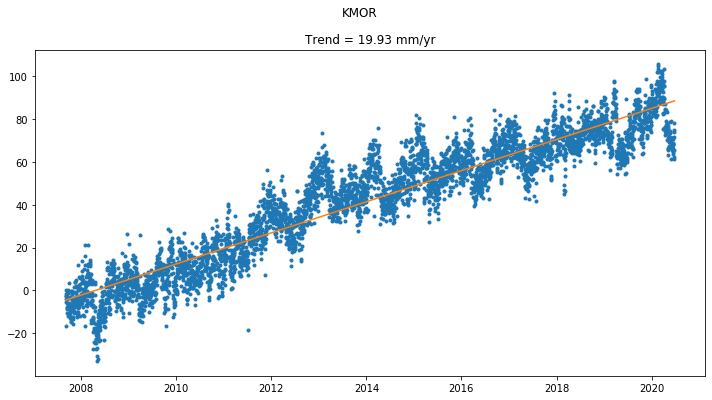

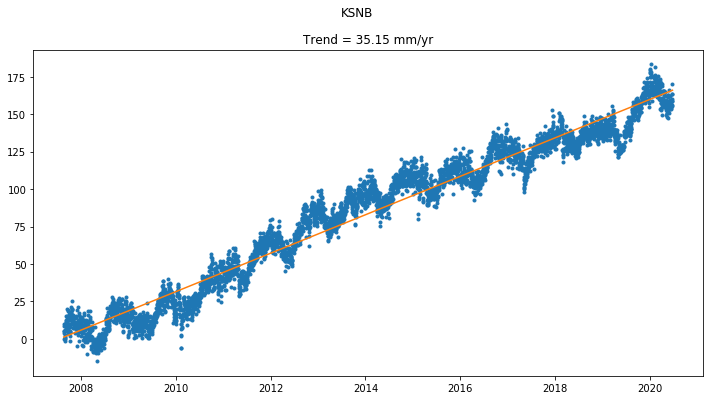

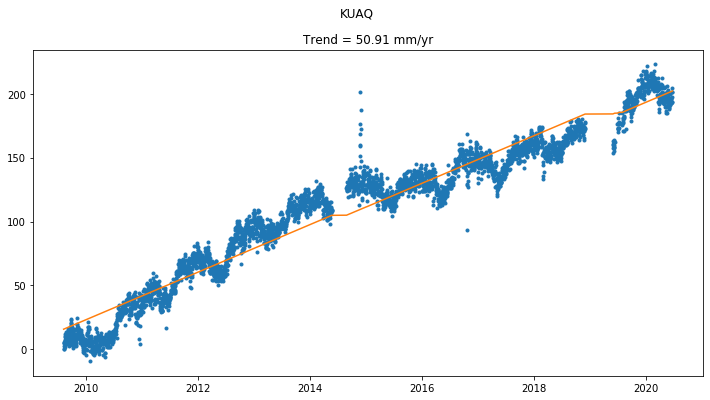

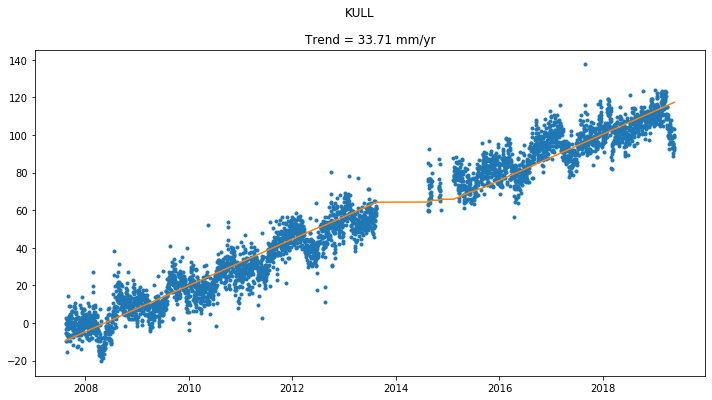

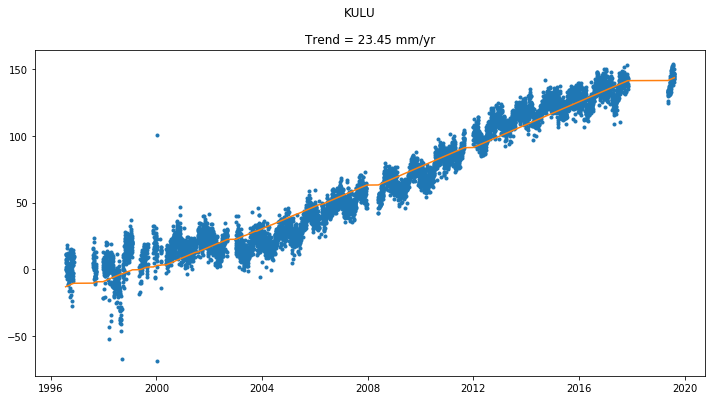

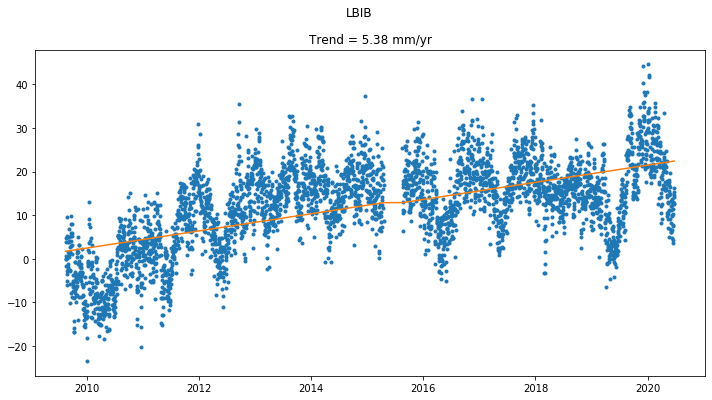

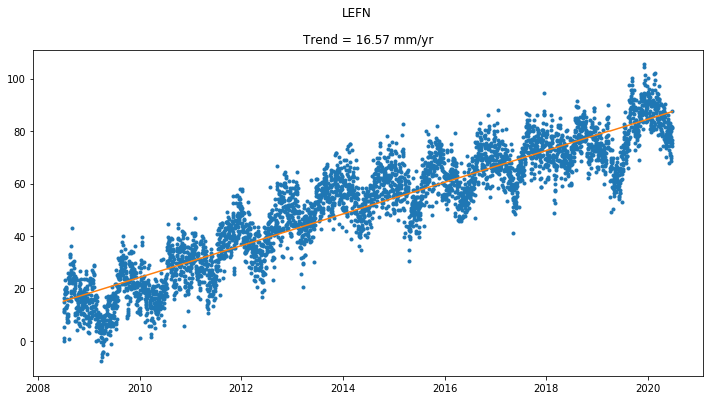

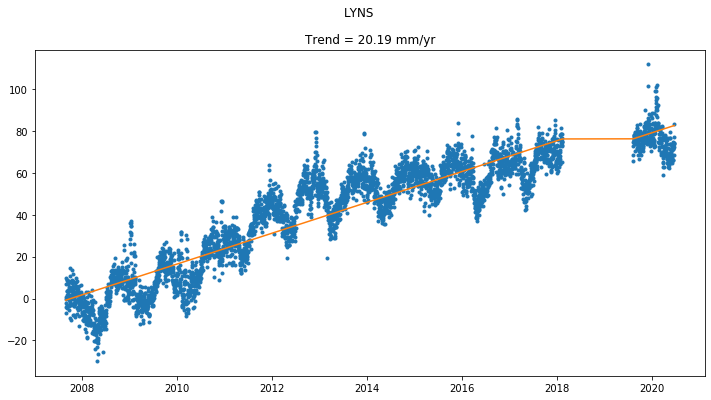

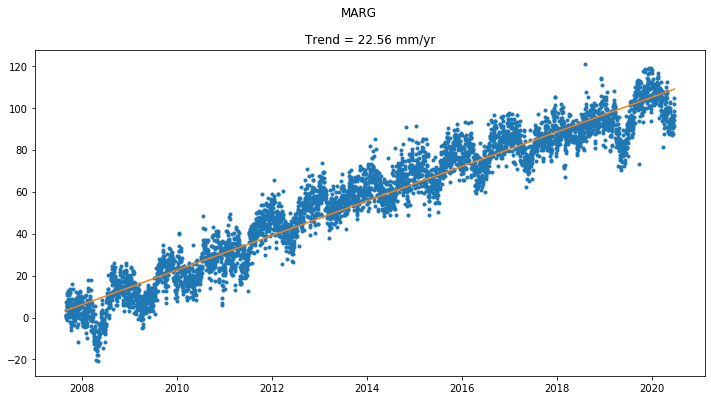

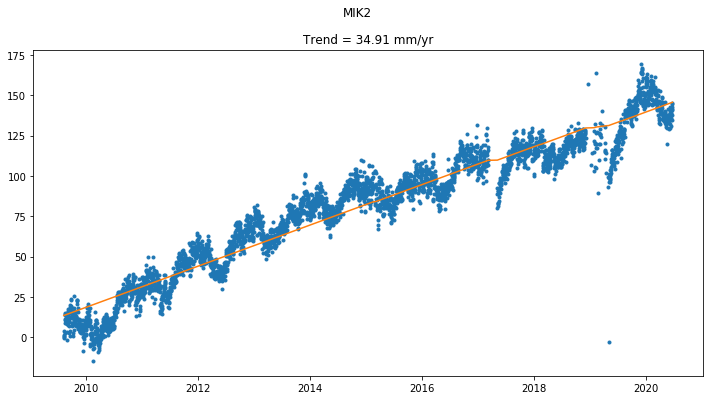

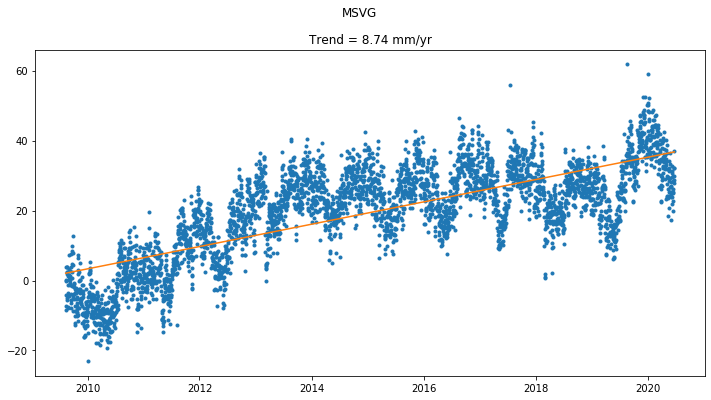

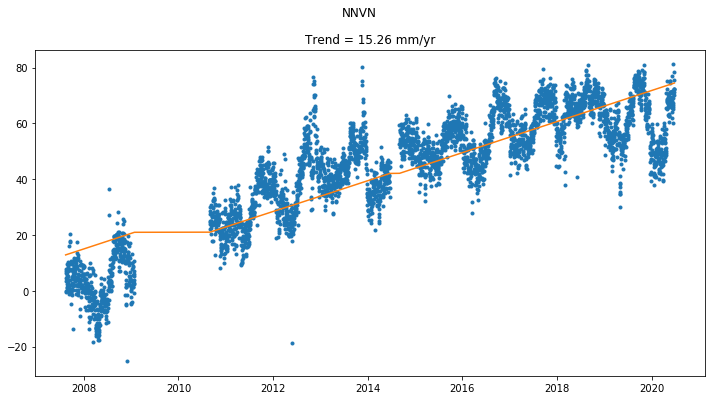

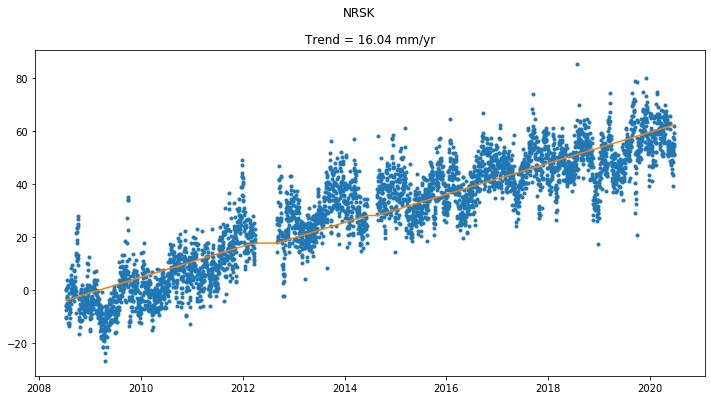

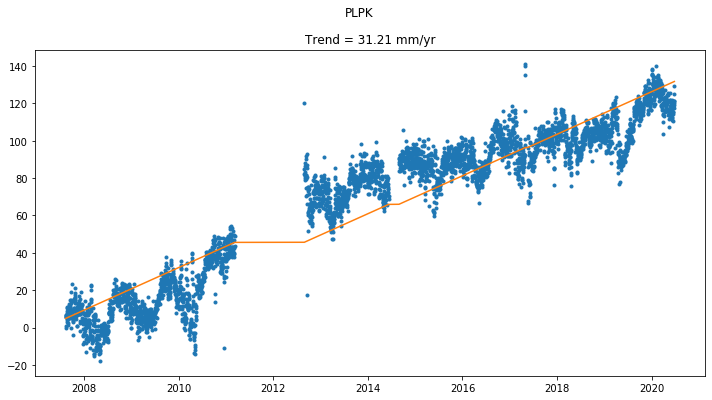

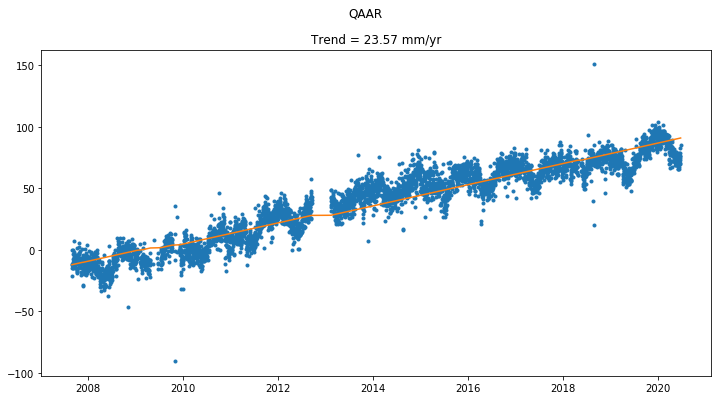

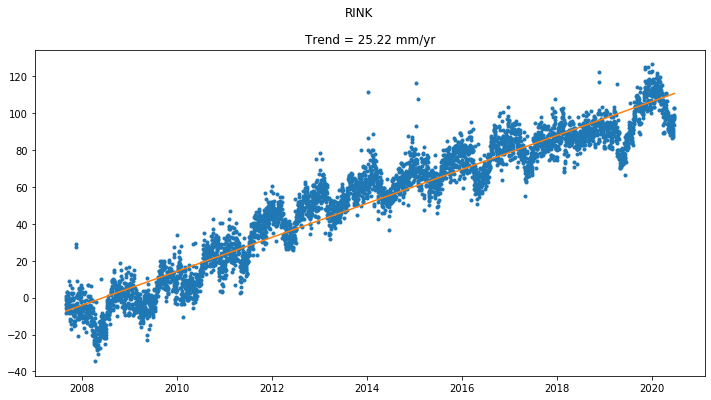

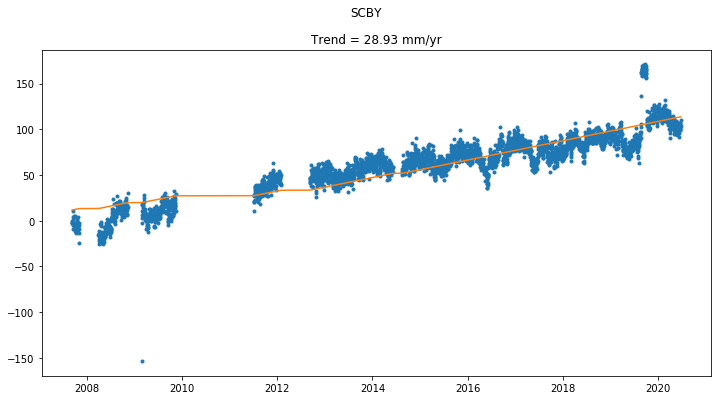

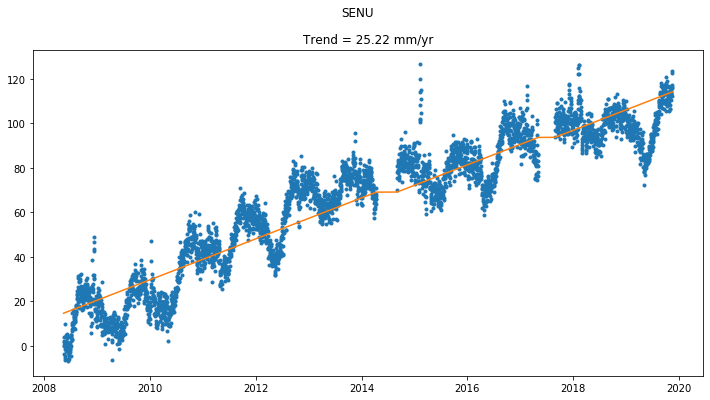

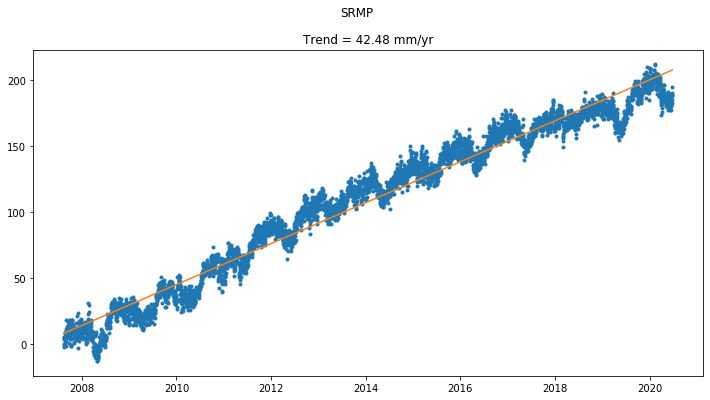

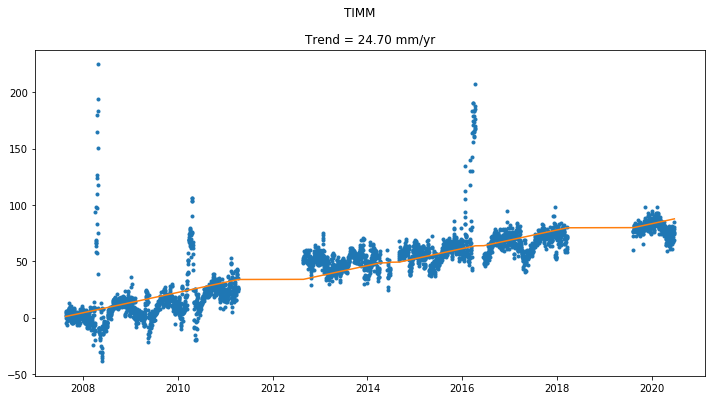

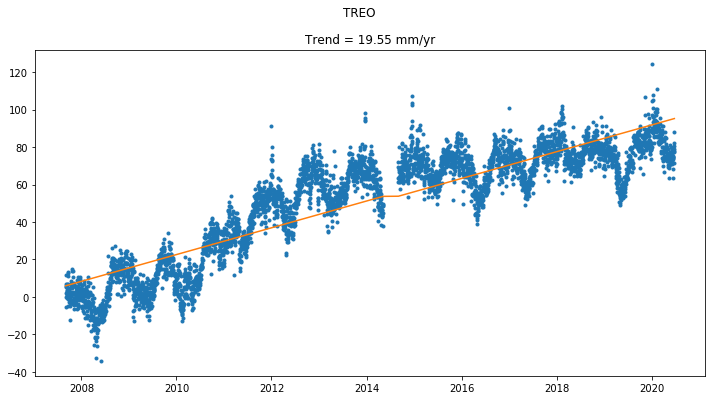

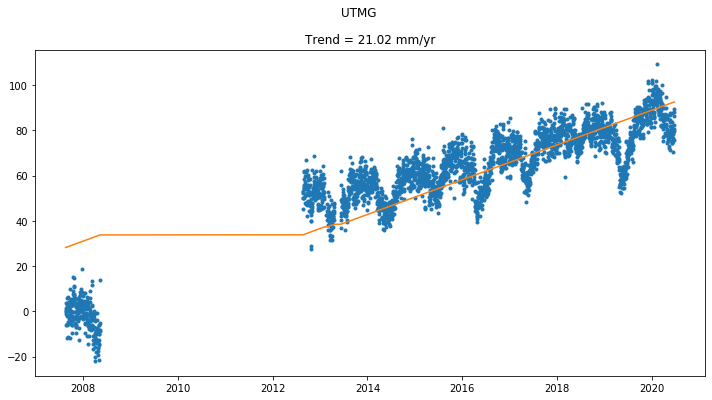

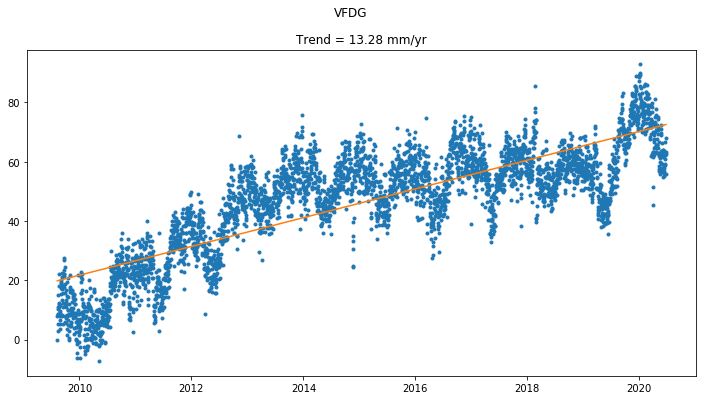

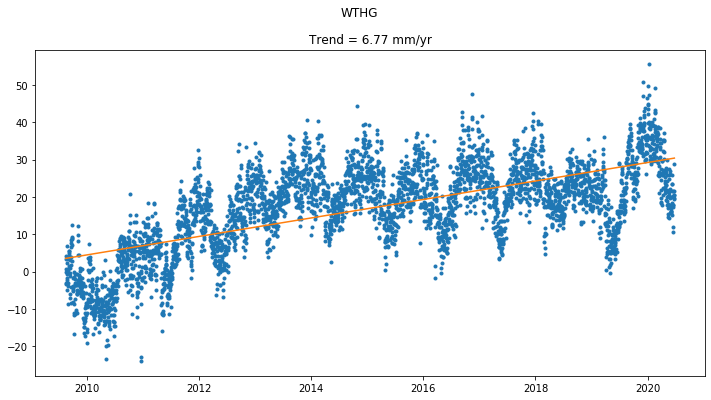

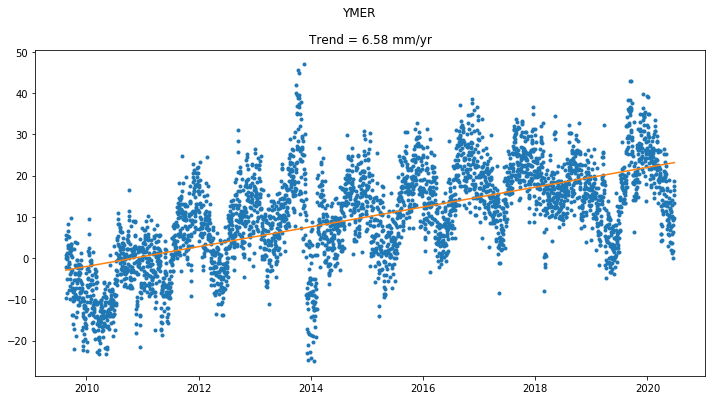

In [9]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_nam14_UNAVCO(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = res.params.x1
    
    # Save site name
    site_name_array.append(filepath[-18:-14])
    
    print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
#     print(res.summary())

    # Make Plot
    test_plot_OLS(df, res, filepath[-18:-14], 'Vertical')